In [1]:
import torch
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
Y = digits.target

X = torch.FloatTensor(X)
Y = torch.LongTensor(Y)


In [2]:
from models.load_models import MyMLP
net = MyMLP(X.size()[1], 10)
print(net)

MyMLP(
  (ln1): Linear(in_features=64, out_features=32, bias=True)
  (relu1): ReLU()
  (ln2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): ReLU()
  (ln3): Linear(in_features=16, out_features=10, bias=True)
)


In [3]:
X = X.to("cuda:0")
Y = Y.to("cuda:0")
net.to("cuda:0")

MyMLP(
  (ln1): Linear(in_features=64, out_features=32, bias=True)
  (relu1): ReLU()
  (ln2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): ReLU()
  (ln3): Linear(in_features=16, out_features=10, bias=True)
)

In [4]:
from torch import nn, optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [5]:
losses = []

for epoc in range(1000):
    optimizer.zero_grad()
    y_pred = net(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())


In [6]:
print(X.shape)
print(X[0:5,:])

torch.Size([1797, 64])
tensor([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10., 15.,
          5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4., 12.,  0.,
          0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.,  0.,  4.,
         11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5., 10., 12.,  0.,  0.,
          0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,  9.,
          0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7., 15., 16.,
         16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,  0.,  0.,  0.,
          1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,
          0.,  0.,  0., 11., 16., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15., 14.,
          0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,  1.,  6.,
         15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,  0.,  0.,  9.,
        

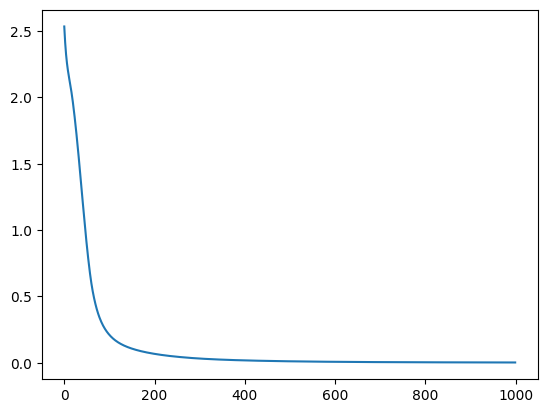

In [19]:
import matplotlib.pyplot as plt
plt.plot(losses)